# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

os.getcwd()

'C:\\Users\\filia\\Springboard DS\\Guided Capstone\\1588204790_GuidedCapstoneStep6HL.ipynb'

In [2]:
path = 'C:\\Users\\filia\\Springboard DS\\Guided Capstone\\data'
os.chdir(path)
os.listdir()

['coefs&metrics_final_model.csv',
 'for_step_6.csv',
 'models',
 'step2_output.csv',
 'step3_output.csv']

In [3]:
df = pd.read_csv('for_step_6.csv')
df.head()

,Unnamed: 0,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,0,Alyeska Resort,Alaska,3939,2500,1,0.0,0,2,2,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,0
1,1,Eaglecrest Ski Area,Alaska,2600,1540,0,0.0,0,0,0,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,0
2,2,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,0
3,3,Arizona Snowbowl,Arizona,11500,2300,0,0.0,1,0,2,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,1
4,4,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,1


## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [4]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X = df.drop(['Unnamed: 0','Name','state','summit_elev','AdultWeekend'], axis=1)
y = df.AdultWeekend

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [5]:
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [6]:
y_pred = model.predict(X_test)
print(y_pred)

from sklearn.metrics import explained_variance_score, mean_absolute_error
revs = explained_variance_score(y_test, y_pred)
rmae = mean_absolute_error(y_test, y_pred)
print(revs)
print(rmae)

[ 57.96801743  87.35554402  79.91738751  77.81763589  69.40118182
  78.25577878  37.60425242  48.74311874  88.83169383  88.16057799
  52.19895075  77.81967254  52.68022571  65.94009789  63.83297432
  90.65775825  42.40264541  75.3476444   64.1279911   42.92543599
 109.09765146  38.24857088  55.33770461  50.50575501  49.69921958
  65.66866138  66.4739724   77.17807539  62.96332762  64.76664753
  38.46580737  51.07652617  79.37857725  57.79903787  77.70321776
  53.90578984  25.23656853  29.53446081  54.50317596  39.01171017
  48.98844938  63.01760081  90.51836284  69.16423102  69.01207143
  52.62638052  73.57917532 167.47745472  30.6670313   60.74034735
  62.66908281  59.64463826  53.1047201   45.22889856  60.88577896
  41.94797244  86.62635966  31.73224228 124.32093013 117.1918096
  57.82258539  51.80271487  40.09335063  87.11632124  65.08265523
  48.60089906  37.99971627  98.60692495  57.56273241  25.2098935
  64.56908263 151.73335064  56.49809766  63.6258919   76.3071262
  69.18288863

In [7]:
print(lm.intercept_)

64.14562716596511


In [8]:
Coef = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient']).sort_values(by=['Coefficient'], ascending=False)
print(Coef)

                   Coefficient
AdultWeekday         20.068193
clusters              2.728355
vertical_drop         1.899505
Runs                  1.456798
triple                1.324939
surface               1.253443
Snow Making_ac        1.122066
quad                  1.119234
daysOpenLastYear      1.116225
averageSnowfall       0.754531
fastQuads             0.661593
projectedDaysOpen     0.581625
total_chairs          0.500675
NightSkiing_ac        0.367087
LongestRun_mi         0.330602
fastSixes             0.305750
trams                 0.258831
TerrainParks          0.244489
yearsOpen             0.213126
double                0.197429
SkiableTerrain_ac     0.153891
fastEight             0.070828


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [9]:
BigMtn = df[df['Name'].str.contains('Big Mountain Resort')].drop(['Unnamed: 0','Name','state','summit_elev'], axis=1)
BigMtn

,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
151,2353,0,0.0,0,3,2,6,0,3,14,...,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,1


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [10]:
BigMtn_test = scaler.transform(BigMtn.drop(['AdultWeekend'], axis=1))

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [11]:
BigMtn_pred = model.predict(BigMtn_test)
print(BigMtn_pred)

[88.53420611]


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [12]:
print(BigMtn.AdultWeekend)

151    81.0
Name: AdultWeekend, dtype: float64


**<font color='teal'> Predict `Adult Weekday` with select independent variables.</font>**

In [13]:
A = df.drop(['Unnamed: 0','Name','state','summit_elev', 'AdultWeekday'], axis=1) #Without Adult Weekday high colinearity
b = df.AdultWeekday

Ascaler = preprocessing.StandardScaler().fit(A)
A_scaled = Ascaler.transform(A)

b = b.ravel()
A_train, A_test, b_train, b_test = train_test_split(A_scaled, b, test_size=0.25, random_state=1)

model2 = lm.fit(A_train,b_train)
b_pred = model2.predict(A_test)


BigMtn_test2 = Ascaler.transform(BigMtn.drop(['AdultWeekday'], axis=1))

BigMtn_pred2 = model2.predict(BigMtn_test2)
print(BigMtn_pred2)

print(BigMtn.AdultWeekday)

[75.07278682]
151    81.0
Name: AdultWeekday, dtype: float64


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

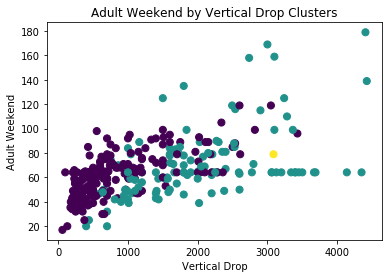

In [14]:
plt.scatter(df['vertical_drop'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
#plt.scatter(df['Runs'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='plasma', label ='clusters')
#plt.scatter(df['AdultWeekday'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
#plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='black', s=100)
plt.xlabel('Vertical Drop')
plt.ylabel('Adult Weekend')
plt.title('Adult Weekend by Vertical Drop Clusters')
plt.show()
#plt.savefig('figures/fig1.png',bbox_inches='tight')

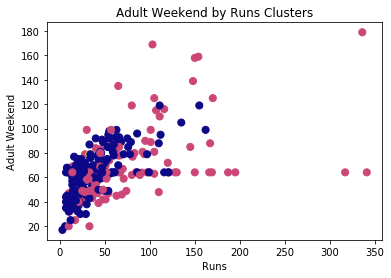

In [15]:
plt.scatter(df['Runs'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='plasma', label ='clusters')
plt.xlabel('Runs')
plt.ylabel('Adult Weekend')
plt.title('Adult Weekend by Runs Clusters')
plt.show()

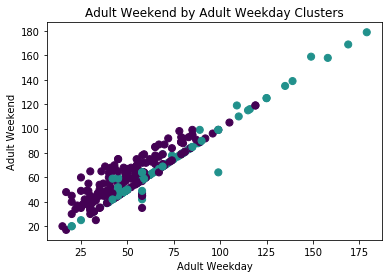

In [16]:
plt.scatter(df['AdultWeekday'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('Adult Weekday')
plt.ylabel('Adult Weekend')
plt.title('Adult Weekend by Adult Weekday Clusters')
plt.show()

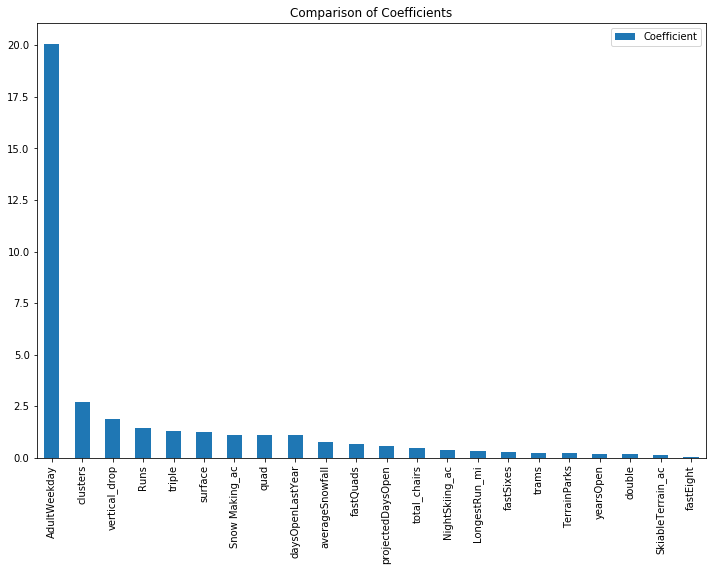

In [17]:
Coef.plot(kind='bar', figsize=(12,8))
plt.title('Comparison of Coefficients')
plt.show()

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [18]:
import pickle
os.chdir('C:\\Users\\filia\\Springboard DS\\Guided Capstone\\models')
os.getcwd()
pickle_out = open('unit6_model.pickle', 'wb')
pickle.dump(model, pickle_out)
pickle_out.close()
#from joblib import dump, load
#dump(model, 'models/regression_model_adultweekend.joblib')
os.listdir()

['unit6_model.pickle']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [19]:
metrics = pd.DataFrame({'rmae':[rmae],'revs':[revs]})
metrics = pd.concat([metrics]*22, ignore_index=True)
lists = [Coef, metrics]

coef_and_metrics = pd.concat(lists)
coef_and_metrics

,Coefficient,rmae,revs
AdultWeekday,20.068193,NaN,NaN
clusters,2.728355,NaN,NaN
vertical_drop,1.899505,NaN,NaN
Runs,1.456798,NaN,NaN
triple,1.324939,NaN,NaN
surface,1.253443,NaN,NaN
Snow Making_ac,1.122066,NaN,NaN
quad,1.119234,NaN,NaN
daysOpenLastYear,1.116225,NaN,NaN
averageSnowfall,0.754531,NaN,NaN


In [20]:
coef_and_metrics.to_csv('coefs&metrics_final_model.csv')
os.listdir()

['coefs&metrics_final_model.csv', 'unit6_model.pickle']